In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.ensemble import BaggingClassifier   
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
classifier = BaggingClassifier(n_estimators=80,max_samples=0.71 ,max_features=0.5) 

**<font size=5 face=雅黑>Bagging介紹</font>**

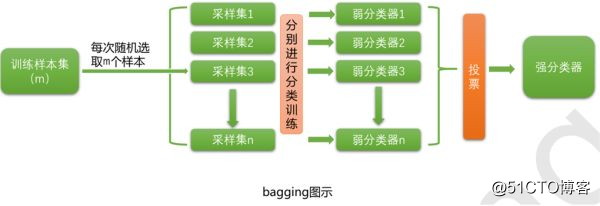

In [ ]:
特色:
    1.每個弱分類器中，輸入的資料皆從原始資料重複取樣，因此分布相同並獨立
    2.各分類器權重平等，可以採用相同或不同演算法    
    3.特色在於隨機取樣(bootsrap)-在訓練集裡面採集固定個數的樣本，但是每採集一個樣本後，都將樣本放回。也就是說，之前採集到的樣本在放回後有可能繼續被採集到。
    

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#----------------------------------------------------------------------------------------------------資料前處理
train_x = train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
Std = StandardScaler()
train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = Std.fit_transform(train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) #標準化
train_x[['HasCrCard','IsActiveMember']] = train_x[['HasCrCard','IsActiveMember']].astype(str)
train_x_dummies = pd.get_dummies(train_x) 
train_y = train['Exited']
#------------------------------------------------------------------------------------------------------------------------------
test_x = test[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
test_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = Std.fit_transform(test_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) #標準化
test_x[['HasCrCard','IsActiveMember']] = test_x[['HasCrCard','IsActiveMember']].astype(str)
test_x_dummies = pd.get_dummies(test_x)
dummy = test_x_dummies.columns.tolist()

<ipython-input-2-9f643ff10bcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = Std.fit_transform(train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\python37\lib\site-packages\pandas\core\frame.py:3191: Settin

In [3]:
parameters = {'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [2,3,4, 5, 6]}

clf = GridSearchCV(classifier, param_grid=parameters, scoring='roc_auc')
clf.fit(train_x_dummies, train_y)

pred_y =clf.predict(test_x_dummies)
#classifier.fit(train_x_dummies, train_y )
#pred_y = classifier.predict(test_x_dummies)
pred_y = (pred_y > 0.5)
final = {"RowNumber": test["RowNumber"],'Exited':pred_y}
final_df = pd.DataFrame(final)
final_df.to_csv('final.csv')

ValueError: Invalid parameter learning_rate for estimator BaggingClassifier(max_features=0.5, max_samples=0.71, n_estimators=80). Check the list of available parameters with `estimator.get_params().keys()`.